In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
diamonds = pd.read_csv("../input/seaborn-practice/diamonds.csv")

df = diamonds.copy()

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


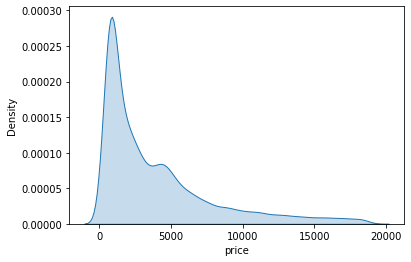

In [3]:
sns.kdeplot(df.price, shade = True); # shade ---->> Grafigin Altinda Bulunan Alani Boyamak Icin Kullanilir ( Doldurmak Icin )

# Grafikten Cikarilacak Yorum; Normalde Tek Tepeden Olusan Bir Grafik Gormek Isteriz Fakat Grafikte Iki Tepeli Bir Yapi Olusmustur ( Bu Ne Demektir ? ) ( Bu Genelde Su Anlama Gelir )
# Odaklanilan Sayisal Degiskenin Icerisindeki Bilgiyi (Yapiyi) Olusturan Birden Fazla Faktor Vardir Demektir ( Bu Durumda Asagidaki Grafikteki Gibi Bilgilerde Bi Alt Katmana Inmek Gerekir )
# Sadece Bu Grafige Bakarak Bir Karar Almak Dogru Degildir Cunku Yaptigimiz Cikarimlardan Bi Alt Katmana Inilmesi Gerektigini Ogreniyoruz ( Iki Tepeli Grafiktir )

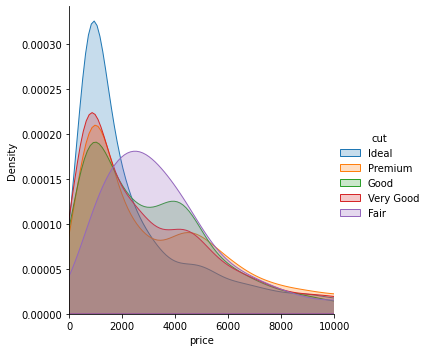

In [4]:
# FacetGrid ---->> Grafik Uzerine Eklenen Boyutlari Bolerek Gostermek Icin Kullanilir


# Bir Yogunluk Grafigi Olusturucaz Bunun Uzerine Boyut Eklemek Istiyoruz ( boyut: "cut" kategorik Degiskeninin Siniflarini Boyut Olarak Eklemek Istiyoruz )( Caprazlayarak Degerlendirmek Istiyoruz )
# Bu Durumda Bu "cut" Ile Bu kdeplot unu map lememiz Gerekiyor ( Bunu Yapmanin Yoluda "map" Fonksiyonudur ) ( Yani Eslemesiz Gerekiyor )


(sns
 .FacetGrid(df,
              hue = "cut",# Boyut Ekleme
              height = 5,
              xlim = (0,10000)) # x Ekseninde Araligi Belirliyoruz
.map(sns.kdeplot, "price", shade = True) # Bir "kdeplot" ( Yogunluk ) Grafigi Olusturucaz "price" ye Gore Fakat Bunu "FacetGrid" Fonksiyonunu Kullanarak Tum "cut" Siniflariyla map lemiş Olucaz
.add_legend() # Bilgi Eklemek Adina Kullanilir ----->> Burada Grafigin Uzerine Eklemis Oldugumuz "cut" Kategorik Degiskeninin Katagorileri Bilgilerini Eklemek Icin Bu Fonksiyon Kullandik
);


# .add_legend() Fonksiyonu Grafikte Sag Tarafta Bulunan [ Ideal, Premium, Good, Very Good, Fair ] ---->> Ifadelerini Gostermeye Yarar

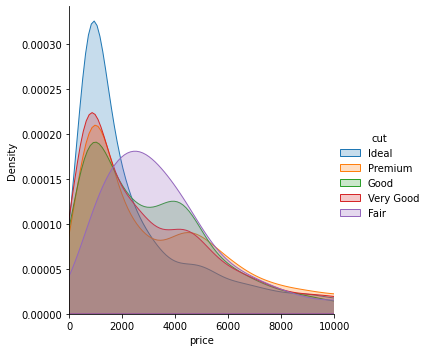

In [5]:
# Ustteki Grafigin Bire Bir Aynisidir ( Yorum Eklemek Icin Buraya Bi Daha Yazdim )

(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
.map(sns.kdeplot, "price", shade = True)
.add_legend()
);

# Grafikten Cikarilacak Yorum;

# Ideal Sinifin 0-2000 Arasinda Digerlerine Gore Daha Fazla Yer Kapladigi Gozleniyor
# Tum Kategorik Degisken Siniflarinin 6000 Fiyatlanmasindan Sonra Birbirine Cok Yakin Frekanslarda Gozlemlendigi Gozukuyor

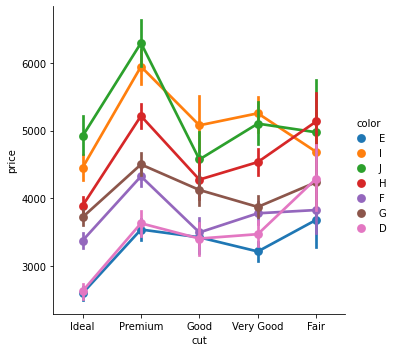

In [6]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df); # kind ----->> (sesli u ( tur )) Adinda bi Ek Arguman kullaniyoruz (sesli u ( tur )) u Ifade Etmek Icin Kullanilir

# kind = "point" Dedigimizde Noktalar Ile Ifade Edilmis Olucaktir

# Yine Elimizde bir Sayisal Degisken Olan "price" Ve Iki Tane Kategorik Degiskenimiz Var (cut, color)


# Grafikten Cikarilacak Yorum; Burada Fiyatin Farkli Seviyelerinde Iki Kategorik Degiskenin Etkilerini Gorebiliyoruz.
# y ekseni price'yi, x Ekseni cut'un Siniflerini ve Her Farkli Renk Ise color'un Siniflarini Ifade Ediyor
# Ornegin Ideal Uzerinden Dusunecek Olursak Renklerin Farkli Seviyelerde Gozlemleniyor Olmasi Color Araciligiyla cut Degiskeni Siniflari Kesisiminde Bir Bilgi Tasindigi (Birbirinden Farkli) Anlamina Geliyor
# Ama Ustteki Bilgi Ideal Sinifinin Alt Kisminda Bulunan Renklerde Mor Ve Mavi Icin Bu Gecerli Degildir ( Yani Bilgiler Birbiri Ile Aynidir )

In [7]:
# Makine Ogrenmesinde Amacimiz; Hedefledigimiz Bagimli Degiskende Var Olan Bilgiyi, Var Olan Degisimi Farkli Degiskenlerce Aciklamaya Calismaktir.
# Bu Degisimi Farkli Degiskenlerce Aciklamaya Calismak Amacinin En Buyuk Hedefi Veri Setinin Icerisindeki Hedef Degisken Hedefiyle Degiskenliklerin Bulunmaya Calisilmasidir. Yani Ornegin;
# Elimizde Uc Degiskenli Ust Taraftaki Gibi Bir Veri Seti Olsun (price, cut, color Degiskenleri Var) Bunu Biz Makine Ogrenmesi Dedigimiz Yontemler Ile
# Modellemeye Basladigimizda Arka Taraftaki Algoritmalarin En Buyuk Amaci Sudur; "price" Degiskeninin Icerisindeki Bu Bilgiyi (0-18k Arasinda Degerleri Vardi ( Hatirlatma ) ) Diger Degiskenlerce
# Aciklamaya Calismak Oluryor. Diger Degiskenlerce "price" nin Aciklanma Cabasinin En Onemli Noktasi Ise "price" nin Icerisinde Bu Degiskenlerin Ayirt Edici Bilgi Tasimasi Oluyor ( Cok Onemli Bi Konu !!)
# Ideal Sinifina Baktigimizda "price" ye Gore Renklerin Farkli Bir Sekilde Dagilmis Olmasi Ayit Edici Bir Bilgidir
# y Ekseninde Ki Degerlere Baktigimizda ( Degerler Neden Boyle ) ----->> Degiskenleri birbirleri Arasinda (Cok Boyutlu) Karsilastirdigimizda Ortalama Degerlerdir

In [8]:
# - Boxplot - ( Kutu Grafik ) - ( Hitogram Grafigi Gibi Sayisal ( Surekli ) Degiskenin Dagilimi Incelenmek Isteniyorsa Kullanilir )

### Veri Seti Hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [9]:
tips = pd.read_csv("../input/seaborn-practice/tips.csv")

df = tips.copy()

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# Veri Setini Tanima Yapiyoruz

df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [11]:
# Kategorik Degiskenlerin Frekanslarini Saydirip Kategorik Degiskeni Taniyalim

df["sex"].value_counts() # Frekanslarina Baktigimizda Siniflarina Ve Degerlerine Eristik ( Cinsiyet Icin )

Male      157
Female     87
Name: sex, dtype: int64

In [12]:
# Diger Bir Kategorik Degisken

df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [13]:
# Diger Bir Kategorik Degisken

df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [14]:
# Diger Bir Kategorik Degisken

df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

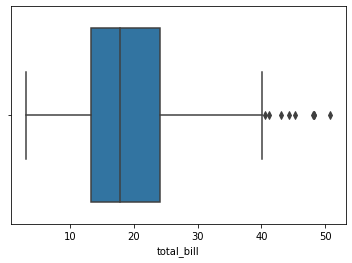

In [15]:
sns.boxplot(x = df["total_bill"]); 

# En Sol Tarafta Bulunan Cizgi "Min" Degeri
# Mavi Kutunun (Ustunde Olan) Sol Tarafindaki Cizgi %25 Degeridir
# Mavi Kutunun Icerisinde Bulunan Cizgi "medyan" ( %50 ) Degeridir
# Mavi Kutunun (Ustunde Olan) Sag Tarafindaki Cizgi %75 Degeridir
# Grafigin En Sag Tarafinda Bulunan Nokta "Max" Degeridir
# Noktalar Aykiri Olan Degerlerdir

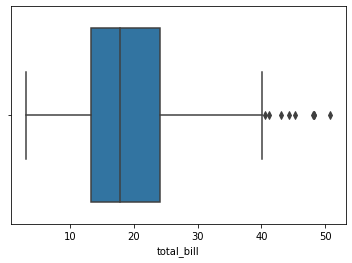

In [16]:
 # Usttekinin Bir Farkli Gosterimi

sns.boxplot(x = df.total_bill); # Bu Yatay Bir Grafiktir Bunu Dik Bir Sekilde De Olusturabiliriz ( Asagida )

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


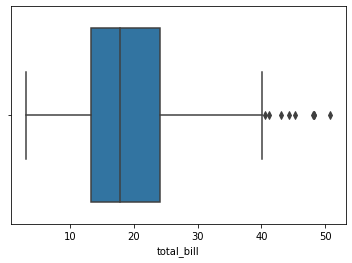

In [17]:
# Dikey Boxplot  ------->>    orient = "v"   ------->>  Dikey Yapmaya Yarar

sns.boxplot(x = df["total_bill"], orient = "v"); # Sadece x Ekseni Belirtildigi Icin Dikey Olarak Goruntulenme Yapilmiyormus

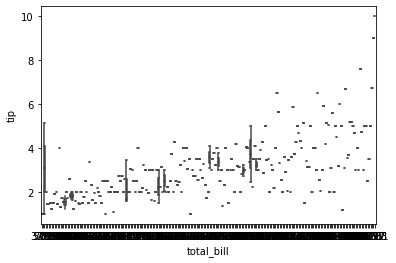

In [18]:
sns.boxplot(x = df["total_bill"],y = df["tip"], orient = "v"); # Kafama Gore Bi Grafik Denedim 2 Eksenli Sonra Yorumlanacak ( Ilerki Seviyelerde ( Kendim Yapicam ) ) ( Simdi Bilgim Yetmeyebilir )

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [20]:
# Veri-Setini Daha Iyi Anlayabilmek ( Analiz Edebilmek ) Icin Sorular Sormaya Basliyoruz

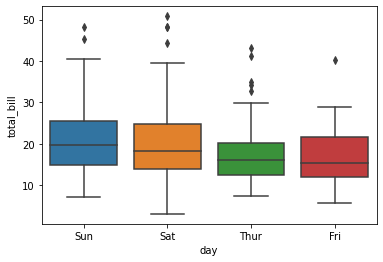

In [21]:
# Hangi Gunler Daha Fazla Kazaniyoruz?

sns.boxplot(x = "day", y = "total_bill", data = df);

# Yorum; Yukaridaki Code lerde ( 14. Code Satirinda ) Cumartesi Gunleri Daha Fazla Insan Geldigini Gormustuk Fakat Pazar Gunu Daha Az Insan Geldigi Halde Daha Fazla Gelir Getirdigi Gorulmustur.

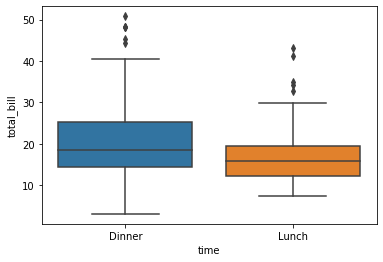

In [22]:
# Sabah mi Aksam mi Daha Cok Kazaniyoruz?

sns.boxplot(x = "time", y = "total_bill", data = df);

# Yorum; Aksam Yemeklerinde Daha Fazla Gelir Elde Edildigi Gorulmustur

In [23]:
# Iki Grafikten Bir Sonuca Varmaya Calisirsak; En Deneyimli Elemanlarimi Aksam Saatlerine Ve Hafta Sonlarina Gore Ayarlarim Cunku Satislar O Zamanlarda Daha Fazladir

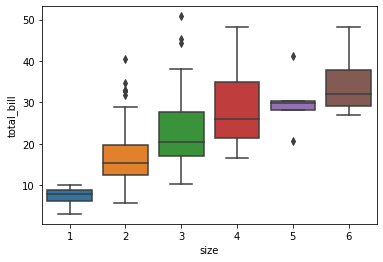

In [24]:
# Yemege Gelen Grup Sayisi Ile Kazanc Dogru Orantili midir?

sns.boxplot(x = "size", y = "total_bill", data = df);

# Yorum; Evet Dogru Orantilidir

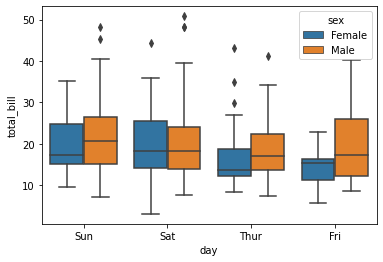

In [25]:
# Cinsiyet Goz Onunde Bulunduruldugunda Gunlere Gore Gelir Ne Durumdadir ?

sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

# Yorum; Cumartesi Gunu Disinda Kadinlarda Hesap Odeme Durumu Erkeklere Nazaran Yukarida Olan Degerler Yoktur

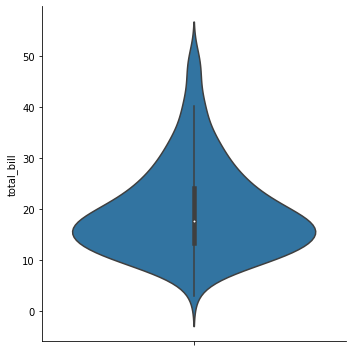

In [26]:
# - Violin Grafik - ( Boxplot'a Benzerdir, Dagilim Anlaminda Bize Bilgi Sunar, Yogunluk Grafigi Ile Kutu Grafiginin (Boxplot) Kesisimi Gibi Dusunulebilir.) ( ! Dikkat ! ----->> catplot Ile Olusturduk)

sns.catplot(y = "total_bill", kind = "violin", data = df); # Gozlemlenecegi Uzere Yogunluk Grafiginin Ekseni Cevrilmis Ve Boxplot'un Koselere Gore Hassasiyeti Arttirilmis Seklinde Gozukur

# Bu Grafikte Bize Merkezdeki Konumlanmaları ( Merkezi Egilimi ) Sunan Ayni Zamanda Ortasinda Boxplot Benzeri Grafik Ile Medyani Ile Ilgili Bir Bilgi Sunan Bir Grafiktir

# Yani Burdan Boxplot'tan Yapmis Oldugumuz Yorumu Yapabiliriz ( Medyan fln Gorebiliyoruz )

# Daha Once Ele Aldigimiz Histogram Ve Boxplot ( Sayisal Degiskenlere Odaklanirken ) Kesinlikle Kullanilir Ama Violin Grafik Tercihen Kullanilir Onlara Nazaran

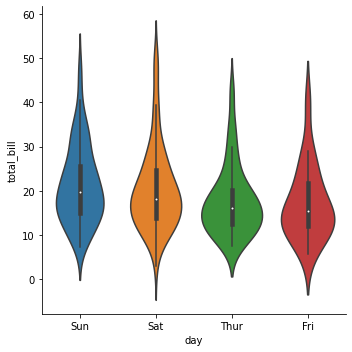

In [27]:
# Violin Grafik Ile Caprazlamalar

sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df); # Onceki Eklemelerimizdeki Gibi Bir Kategorik Degiskeni Boyut Olarak Ekleyip Siniflari Uzerinden Yorum Yapicaz

In [28]:
# Kirilim - Boyut Eklemek - Caprazlamak ------->> Hepsi Ayni Anlama Gelir

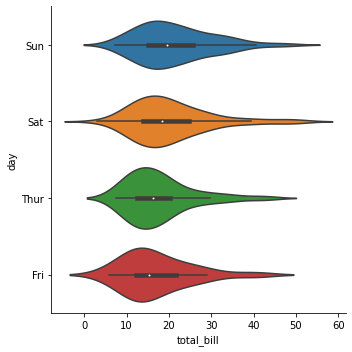

In [29]:
sns.catplot(x = "total_bill", y = "day", kind = "violin", data = df); # Yatay Dondurme Islemi ( Boyutlarin Yerlerini Degistirdim )

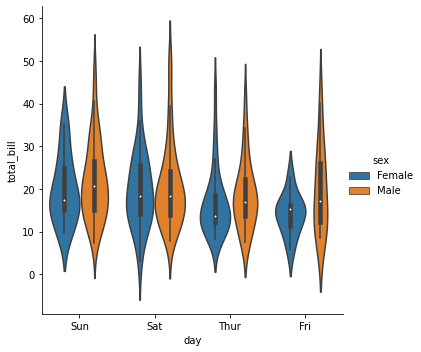

In [30]:
# Yeni Bir Boyut Daha Ekleme

sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

In [31]:
# - Korelasyon Grafiginin Olusturulmasi - ( Korelasyon; Degiskenler Arasindaki Iliskiyi Ifade Eden Istatistiksel Bir Terimdir )

# Iki Degisken Arasindaki Iliskiyi Ifade Etmek Icin Kullanilan Ve En Cok Bilinen Yaklasim "Scatterplot" ( Sacilim Grafigi ) Yaklasimisir

# Scatterplot; Bize Sayisal Degiskenler Arasindaki Iliskiyi Gosterir Yani Bu Iki Degisken Bir Arada Degerlendirildiginde Veri Seti'nin Icerisinde Ortaya Cikan Yapi Hakkinda Bize Bilgi Verir


In [32]:
# Bu Zamana Kadar Degiskenleri Tek Degiskenli Olarak Ele Aldik Yani Elimizde Tek Degisken Vardi, Bu Degiskenin Tipine Bakiyorduk, Bu Degisken Kategorik Ise Sutun Grafigi (Barplot) Kullandik, Eger Bu
# Degisken Sayisal Ise ( Surekli Yada Kesikli Olabilir Sayisal Bir Degisken Ise) Bu Degiskeni Gorsellestirmek Icin De Histogram, Yogunluk, Boxplot Ve Violin Grafiklerini Ele Aldik Bunlara Eklemis 
# Oldugumuz Ikincil Ucuncul Degiskenler Boyut Anlaminda ( Caprazlama Anlaminda ) Yapilan Eklemelerdi


# Bu Bolumde Ise Iki Sayisal Degiskenin Birlikte Olusturduklari Yapilari Degerlendiricez Yani Tek Degiskenli Veri Gorsellestirmeden Iki Degiskenli Veri Gorsellestirmeye Gecmis Olucaz 
# Ayni Anda Iki Sayisal Degiskenin Ortaya Cikardigi Yapiyi Incelicez Ve Bunun Uzerine Boyut Olarak Ucuncu Dorduncu ...  Degiskenleri De Ekleyerek Arka Tarafta Olusan Bilginin Detaylarina
# Erismeye Calisicaz

# Veri Setimizin Hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [33]:
tips = pd.read_csv("../input/seaborn-practice/tips.csv")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


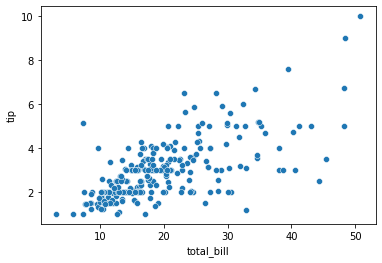

In [34]:
# Bir "Scatterplot" Nasil Olusturulur

sns.scatterplot(x = "total_bill", y = "tip", data = df);

# Su Anda Toplam Odenen Hesap Ve Odenen Bahsis Arasindaki Iliski Gorsellestirilmis  

# Sacilim Grafigi Bize Sayisal Degiskenler Arasindaki Iliskiyi Ifade Eder

# Yorum; Toplam Odenen Hesap Arttikca Bahsislerde Artma Gozlenmis

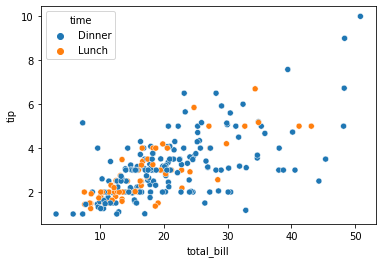

In [35]:
# Scatterplot Caprazlamalar - Scatterplot'a Yeni Boyutlar Ekleyerek Degerlendirmelerimizi Cesitlendirelim ( Caprazlayalim )

sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

# Yorum; Aksam Yemeklerinde Odenen Hesap Arttikca Bahsislerin Arttigini Gozlemliyoruz Ve Ogle Yemeginde Biraz Daha Az Odenen Hesaplarda Bahsislerin Oldugu Gozlemlenmistir



# Onceki Bolumlerde Ele Aldigimiz "Tek Degiskenli" Incelemelerde Alinacak Kararlar Ile "Scatterplot" Ta Alinacak Olan Kararlar "Cok Farklidir"
# Cunku Scatterplot Istatistiksel Bir Teknik Olan Korelasyon Analizinin Gorsel Halidir, Bu Yansiktimis Oldugumuz Korelasyon ( Iliskinin ) Bir de Istatistiksel Karsiligi Vardir
# ( Iliskinin Yonu Ifade Edilir, Iliskinin Anlamli Olup Olmadigi Ifade Edilir ( Bunlar Istatistik Bolumunde Ele Alinir ( Istatistik Video Bolumunde Var Bunlar ) ) )
# Bundan Dolayi Istatistiksel Bir Olcut Olmasi Onun Uzerine Is Kararlarini Bilimsel Anlamda Alma Imkani Saglar. [ {Veriye Dayali Karar Alin} Cumlesinin Aslinda Dayandigi Sey Istatistik Teorisidir ] --->>
# --->> Scatterplot Gibi, Korelasyon Gibi, Hipotez Testleri Gibi Testlerdir, Dolayisi Ile Bunun Uzerine Karar Alinabilir Fakat Bazi Caprazlamalar Ile Detayina Bu Verinin Nasil Olustugunun Anlasilmaya
# Calisilmasi Gerektigidir

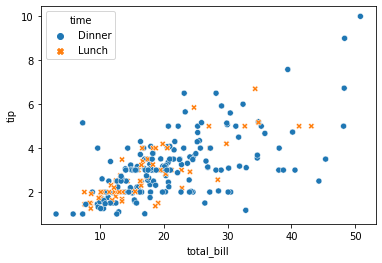

In [36]:
# Biraz Daha Detaylandirma Islemleri Yapalim Ornegin "Noktalarin" "Renkleriyle" Beraber "Tiplerini" De Degistirmek Istedigimizi Dusunelim

sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

# style = "time" ------>> Time Kategorik Degiskeninin Ozelligine Gore ( Siniflarina Gore ) Bolunme Islemi Yapimasi Gerektigini Anliyor ( Bolunmeden Kasit; Simgelerin Farkli Olmasi )

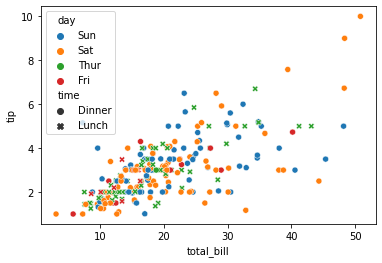

In [37]:
# Ayni Islemi Birde Farkli Degiskenler Ile Deneyelim

sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df); # Burada Extra Bir Kirilim ( Boyut ) Eklenmis Oluyo ( "day" Eklenmisti Bide "time" Eklemis Olduk )

# Odenen Hesap Ile Verilen Bahsis Arasindaki Korelasyon Gosterildi Fakat Birde Bunu Gunler Kiriliminda Gorme Imkani Yakaladik

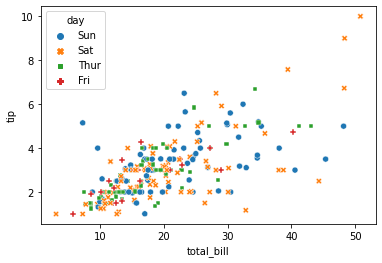

In [38]:
#   "style"   deki "time" Yerine "day" Yazarsak Yapi Biraz Daha Degisti 

sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day", data = df); # Yani Burada "style" Ile "hue" Argumani Ayni Olursa Tek Bir Boyut Olur, "style" Yerine Farkli Bir Ifade Yazarsak

# Diger Bir Boyut Ta Eklenmis Olucaktir

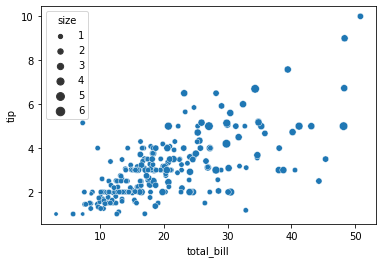

In [39]:
# Yukaridaki Gibi Kategorik Degiskenleri Boyut Olarak Ekledik ( Peki Surekli Bir Degiskeni Boyut Olarak Ekleseydik Ne Olurdu ?)


# size: grupta ( Masada ) kaç kişi var? ( Demekti Veri Setinin Hikayesinde ) ( Yani Sayisal Bir Degiskendi ) ( Hatirlatma )

# Sayisal Bir Degiskeni Eklemek Icin "size" Argumani Ile Bir Ekleme Islemi Gerceklestirdim 

sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = df);

# Yorum; Grafikten Gordugumuz Uzere Yuvarlaklarin Boyutu Arttikca "size" Buyuyor Yani Masadaki Kisi Sayisi Buyuyor Demektir

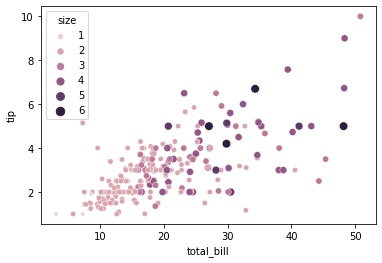

In [40]:
# !! Soo Important !!

# Onemli Bir Bilgi : "hue" Ile "size" In Bilgileri Ayni Oldugunda Renklendirme Isin Icine Giriyo - "Diye Tahmin Ediyorum" - 


# Bu Grafik Ustteki Grafik Ile Ayni Ama Renklendirme ( Ayirt Ediciligi Fazla ) Yaptik

sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

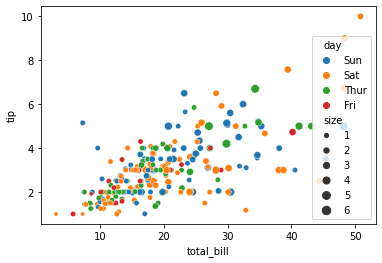

In [41]:
# Bunu Ben Kendi Kafama Gore Olusturdum ( Sonra Incelenecek )

sns.scatterplot(x = "total_bill", y = "tip", hue = "day", size = "size", data = df);

In [42]:
# -- Dogrusal Iliskinin Gosterilmesi --

# Scatterplot Bize Iki Sayisal Degiskenin Arasindaki Iliskiyi Bir Grafik Araciligi Ile Sunmustu, Bu Sacilim Araciligi Ile Sunulan Bilgiyi Bir De Bir Dogru Araciligi Ile Temsil Edebiliyoruz.
# Iste Bu Noktada Bu Dogrusal Durumu Ifade Ederek Iliskiyi Gorsellestirmis Olucaz

In [43]:
# -- Import Etme Islemi --

import matplotlib.pyplot as plt

# Yukaridaki Islem Bi Import Etme Islemidir    "matplotlib"  in Butun Fonksiyonlarini Degilde Sadece "matplotlib" Icerisindeki "pyplot" Isimli Fonksiyonu Import Ediyoruz Bunuda "plt" Diye Isimlendirdik

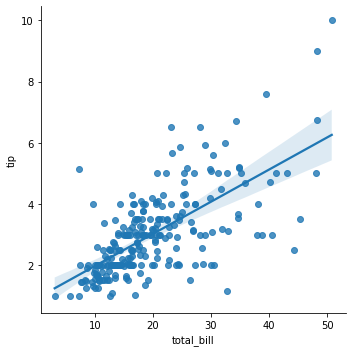

In [44]:
#    .lmplot()   ------>> Lineer Modelin Kisaltilmisidir  ( Dogrusal Bir Cizgi Koyucak Oldugumuzdan Dolayi Bu Fonksiyonu Kullaniyoruz ) 

sns.lmplot(x = "total_bill", y = "tip", data = df);

# Dogrunun Etrafindaki Acik Renkli Mavi Ifade "Sapmalari" Ifade Eder

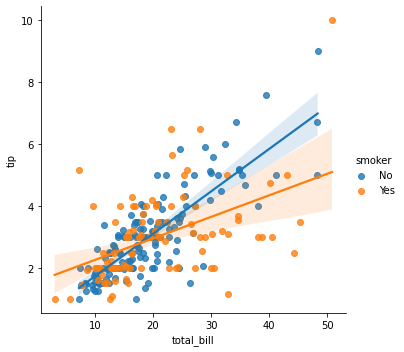

In [45]:
# Burada Cok Onemli Bir Mevzu Var

# Yeni Bir Degisken Ekledigimizde ( smoker : Sigara Icme Durumu )
# Yukaridaki Grafikten Farkli Olarak Bir Dogru Daha Cizdi Ve Dogrunun Egimi Degisti

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

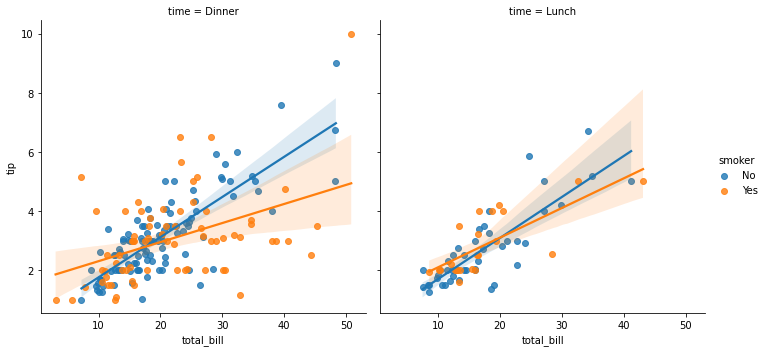

In [46]:
# Grafige Bir Degisken Daha Ekleyelim ( 4. Degiskeni Ekliyoruz ) ( Yeni Bir Arguman Kullaniyoruz )

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

# Burada Kullanilan "col" Argumani Verilmis Olan Bir Kategorik Degiskene Gore ( Ikiye Bolmus Oldu ) Iki Farkli Bir Grafik Olusturmus Oldu



# !!!!!! BAKILACAK !!!!!!
# GECMIS CALISMALARA BAK FASTGRID GIBI BISI DIYO ANLAYAMADIM ORDA DA BOYLE BISI YAPSISIZ AMA TEK GRAFIKTE YAPMISIZ
# BU GRAFIK FASTGRID BENCERI BIR GRAFIK ( FAST GRID TEK GRAFIKTE YAPILIYOMUS )



# Yorum; Ogunlere Gore Egimlerin Nasil Degistigi Gozlenmektedir ( Dolayisi Ile Yorumlama Yaparken Bu Durumlari Goz Onunde Bulundurmak Zorundayiz )
# Makine Ogrenmeden Once Bizim Bu Arka Taraftaki Iliskileri Ogrenmemiz Gerekiyor
# Simdi Grafigi Yorumlarken Zamana Bagli Bu Iki Grafikteki Egimler Farkli Ama Bu Dikkate Alacak Kadar Degerlimi

# Mesela "Dinner" Grafigine Bakacak Olursak Sigara Icenler Ve Icmeyenlerin Egimlerinin Degistigini Gorduk, Demekki Odenen Hesap Ve Bahsis Goz Onunde Bulunduruldugunda Bunlarin
# Iliskileri Soz Konusu Oldugunda Sigara Icip Icmeme Durumuna Gore Aradaki Korelasyon ( Iliski ) Degisiyor Demek
# Ama Bu Iliski Anlamlimi ? ( Bu Sorunun Cevabi Istatistik Videolarinda)

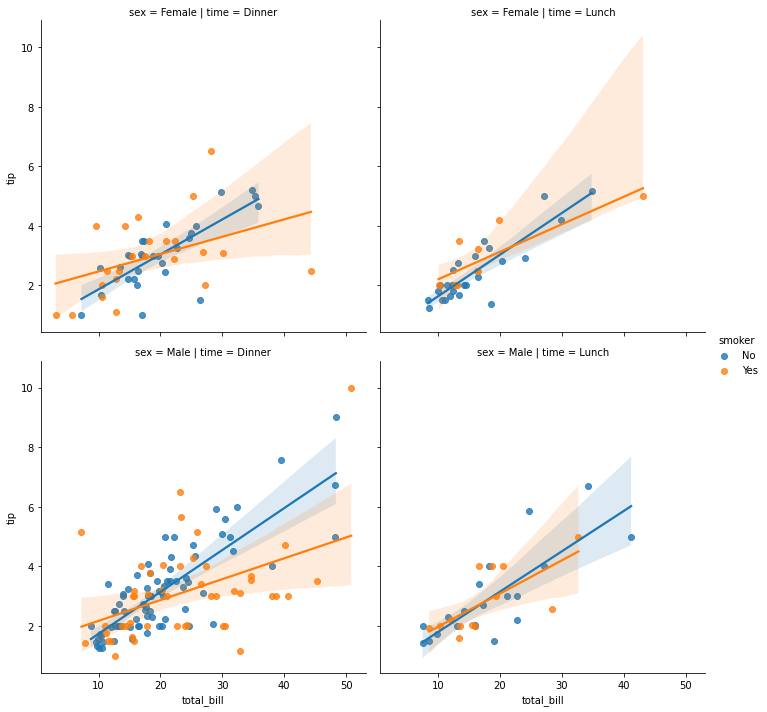

In [47]:
# Grafige Bir Degisken Daha Ekleyelim ( 5. Degiskeni Ekliyoruz ) ( Yeni Bir Arguman Kullaniyoruz )

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

# Satirlara Gore Cinsiyeti Okumamis Gerekiyor, Sutunlara Gore De "time" yi ( Zamani ) Okumamiz Gerekiyor

# Yini Su An Asil Odaklandigimiz Sey Nedir ? ------>> Iki Sayisal Degiskenin Arasindaki Korelasyonun Grafigidir ( Dogrusal Bir Grafik ) ( Iliskinin Grafigidir ) Ama Bunu
# Cinsiyet Degistiginde (Erkek, Bayan) Ve Yemek Degistiginde ( Ogle Yemegi, Aksam Yemegi ) Degerlendiriyoruz

In [48]:
# - Scatterplot Matrisi -

# Veri Seti Icerisindeki Butun Sayisal Degiskenlerin Iliskisini Matris Formunda Yapmaktir

In [49]:
iris = pd.read_csv("../input/seaborn-practice/iris.csv")

df = iris.copy()

df.head()

# Bu Veri Setinin Icerisinde Bazi Cicek Turleri Var Ve Ozellikleri Vardir
# Bu Cicek Turlerinin Ozelliklerini Ifade Eden Degiskenler Yapraklari Ile Ilgili ( Uzunluk, Genislik vb.) Bilgiler Tasir.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
df.dtypes
# Veri Setinin Icerisinde 4 Tane Sayisal Degisken  Bir Tane De Kategorik Degisken Vardir.
# Bu Kategorik Degiskenin Siniflari Arasinda Bir Bir Fark Yok ( Nominal Tipte ) Bu Sebeple "object" Olarak Kalabilir.

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [51]:
df.shape

(150, 5)

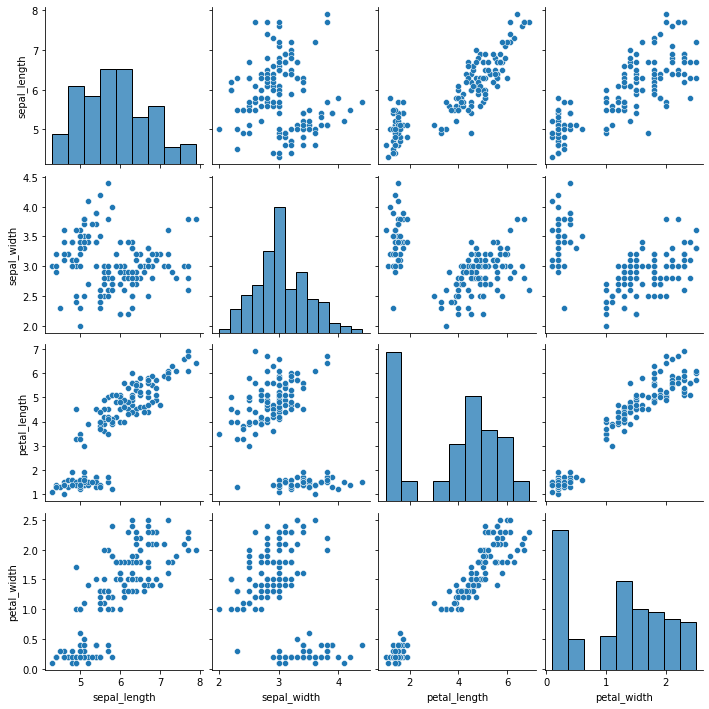

In [52]:
# Simdi sns Icerisinden Bir Scatterplot Olusturma Islemini Ele Alalim ( Farkli Bir Fonksiyon Kullaniyoruz )

sns.pairplot(df); # Veri Setinde Yer Alan 4 Tane Degiskenin Birbirleri Arasindaki Iliskiler Gorsellestirilmis Oluyor


# Yorum;
# Bu Grafigin Bize Sundugu Iki Bilgi Var
# 1. Bilgi; Eksende Yer Alan Grafikler ( Cizgili Olanlar )  ---->>  Bunlar Veri Seti Icerisindeki Degiskenlerin Dagilimini Ifade Eder
# Ornegin "sepal_length" Adli Degiskenin Dagilimi Yanindaki Grafikteki Gibiymis, 2. Satirdakinin ki 2.Sutunda Bulunan Grafikmis Gibi ...
# 2. Bilgi; Eksenlerden Yapilacak Kesistirmeler Ile Degiskenlerin Arasindaki Iliskinin Sunulmasi
# Ornegin (En Alt En Sol Tarafta Bulunan)   "petal_width" Degiskeni Ile "sepal_length" Degiskeni Arasindaki Iliski Gorsellestirilmistir

In [53]:
# !! Soo Important !! ( Scatterplot Ile Ilgili Onemli Bir Bilgi )

# 1. Bilgi;
# Scatterplot ( Sacilim Grafigi ) Gorsellerinde Eger Olusturulmus Olan Grafik Bir "Toz Bulutu" Seklinde Ise Veya Yapisal Bir Formu Yoksa Bu
# O Iki Degisken Arasinda Bir Iliski Olmadigi Anlamina Gelir

# 2. Bilgi;
# Olusturulan Bir Scatterplot Icerisinde Gozlem Noktalari Incelendiginde Bunlar Eger Birbirinden Farkli Koselerde Kumeleniyo Ise Bu Durumda
# ( Sik Sik Vurguladigimiz ) Caprazlama Durumundan Kaynakli Olan ( Caprazlama Durumu Ile Gozlemleyebilecek Oldugumuz )
# Olusan Bu Yapilari ( Farkli Farkli Kumelenmeleri ) Ifade Eden Bazi Alt Gruplar Vardir ( Bunlarin Goz Onunde Bulundurulmasi Gerekir )

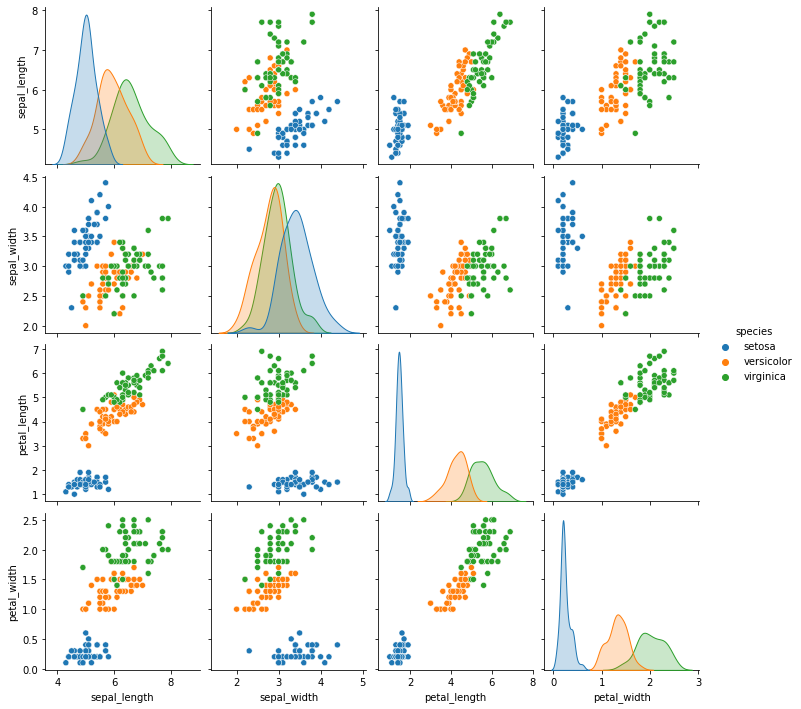

In [54]:
# Yukaridaki Grafige Kategorik Bir Degisken Ekleyelim

sns.pairplot(df, hue = "species");

# Yukarida Dikkat Cektigimiz Gibi Kumelenmeler Vardir ( Bu Durum Farkli Yapilanmalari Ifade Eder )


# Mesela Yukaridaki Grafikte En Sol En Alttaki Ne Baktigimizda X Eksenindeki Artarken Y De Artar Demek Dogru Gibi Gelebilir Fakat Bu Sekilde Detayina Girdigimizde Bu Bilginin
# Cokta Dogru Olmadigi Bu Grafik Sayesinde Ortaya Cikmaktadir

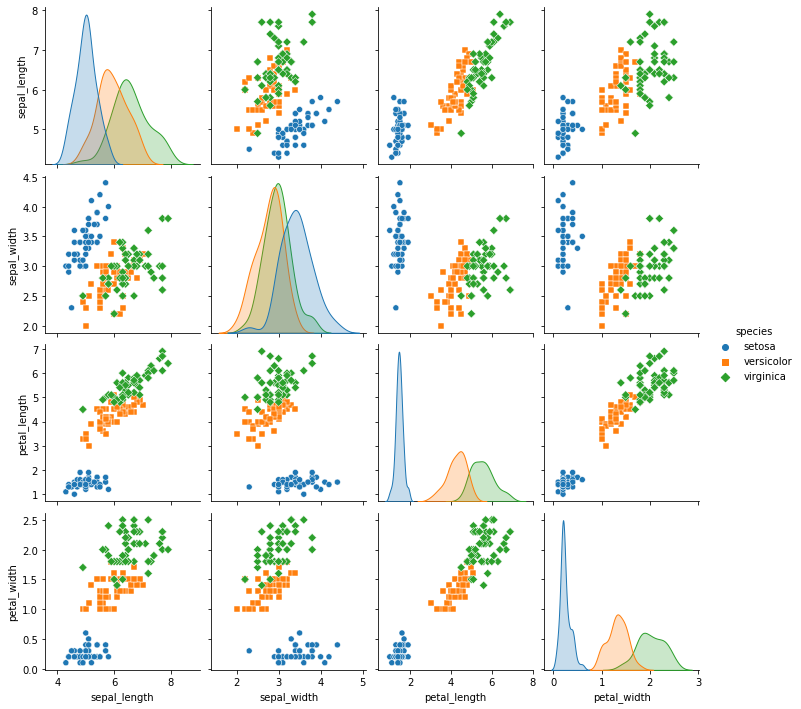

In [55]:
# Turleri Ifade Eden "species" Kategorik Degiskeninin Siniflarinin Sekillerini Degistirmek Istersek "markers" Argumanini Kullaniriz

sns.pairplot(df, hue = "species", markers = ["o", "s", "D"]);

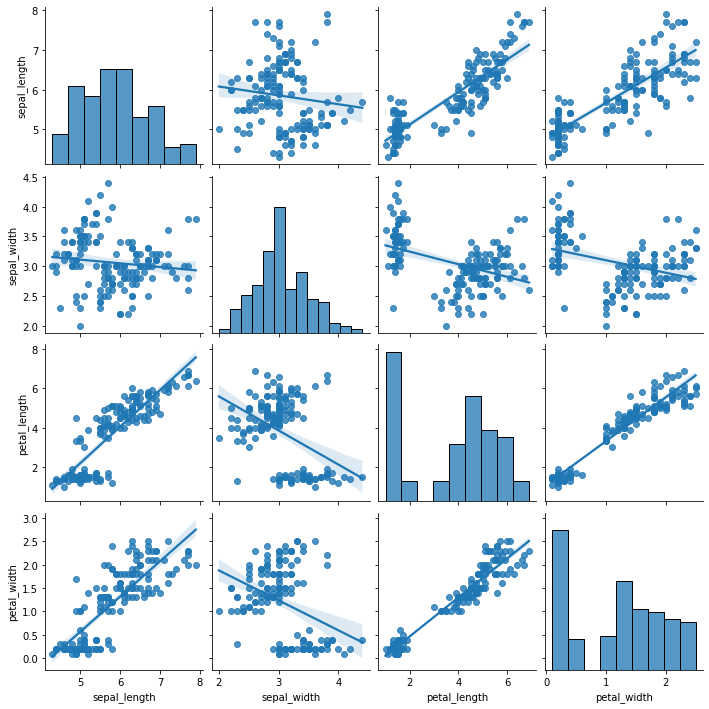

In [56]:
sns.pairplot(df, kind = "reg"); # Bu Sekilde Butun Grafiklere Bir "Dogru" Ekleme Islemi De Yaptik

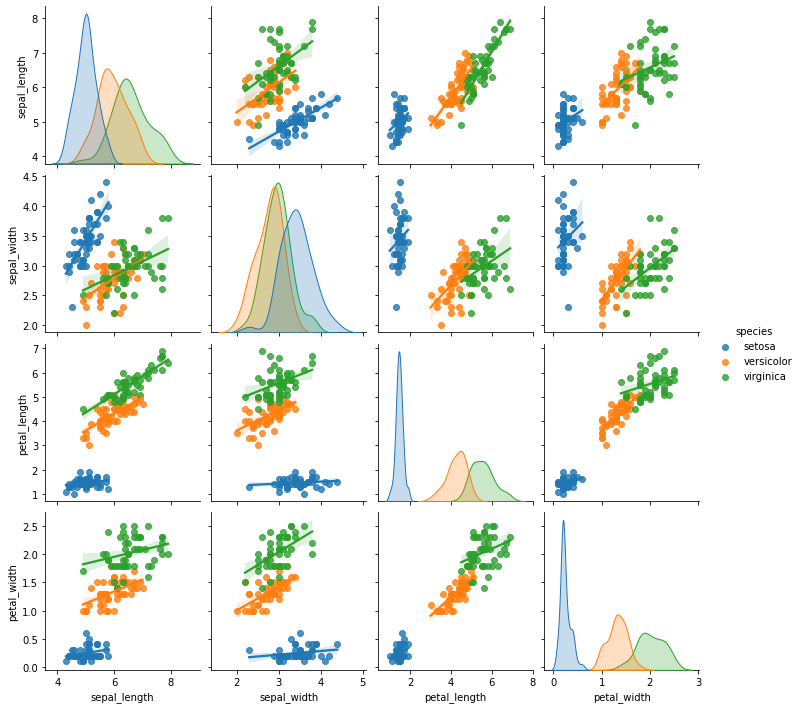

In [57]:
# Uc Yukarida Gozlemlemis Oldugumuz Turlere Gore Ayirma Islemini Birde Egriler Anlaminda Nasil Olacagini Gozlemleyelim

sns.pairplot(df, kind = "reg", hue = "species");

# Bazi Noktalarda Egimin Cok Siddetli Degistigi Gozlemleniyor

# ( Sol En Altin Bir Ustunde Bulunan Grafikte ) y = "petal_length", x = "sepal_length" Grafiginde Yesil (virginica) Ve Turuncu (versicolor) Turleri Goz Onunde Bulunduruldugunda
# Bu Iki Degisken Arasinda ( petal_length, sepal_length ) "Pozitif Yonlu" Cok Siddetli Bir Korelasyon ( Iliski ) Oldugu Gozlenmektedir, ---->> ( Asagidan Devam )
# ( Burdan Devam )   ---->>   Fakat Mavi (Setosa) Turu Goz Onunde Bulunduruldugunda Bu Iliskinin "Dogru Olmadigi" Gozlenmektedir ( Yani Boyle Bir Iliski Yoktur )

In [58]:
# -- Heatmap -- ( Isi Haritasi )

# Elimizdeki Degiskenleri Biraz Daha Yapisal Anlamda Daha Genis Acidan Gormek Istedigimizde Kullanilabilecek Olan Grafik Gorsellestirme Tekniklerinden Birisidir
# Uzun Vadeli Verilerde ( Icerisinde Zaman Serisi Oldugunda ( Yil, Ay Gibi Degiskenler Oldugunda ) ) Bu Donemlere Karsilik Gozlemlenebilecek Olan Bazi Sayisal Degisken Degerleri
# Oldugunda Yada Bunun Disinda Daha Buyuk Olcekli Belirli Periyotlarla Tekrar Eden Olaylari Gormek Istedigimizde Bize Cok Guzel Bilgiler Sunan Bir Grafiktir.
# Sadece Zamansal Baglamda Degil Eger Elimizde Cok Sinifli Bir Kategorik Degisken Ve Bunu Belirli Bir Sayisal Degisken Acisindan Gorsellestirme Ihtiyacimiz Var Ise Bu Durumda da 
# Cok Ise Yaramaktadir.

In [59]:
flights = pd.read_csv("../input/seaborn-practice/flights.csv")

df = flights.copy()

df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


# Veri Setinin Hikayesi

Uc Tane Degiskenden Olusmaktadir

Yillara Ve Aylara Gore Yolculuk Sayilari Ifade Edilmektedir

In [60]:
df.shape

(144, 3)

In [61]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [62]:
# Oncelikle Heatmap Fonksiyonunu Kullanabilmemiz Icin Data Setimizi Yapisal Olarak Degistirmemiz Lazim ( Pivot Tablo Islemine Tabii Tutmak )

# Bu Ifadeyi Daha Once Gorduk

df = df.pivot("month", "year", "passengers");

# Ilk Yazdigimiz Kisim x Eksenini, Ikinci Yazdigimiz Kisim y Eksenini, Son Kisim Surekli Degiskeni ( Kesisimlerinde Yer Alacak Olan ) Ifade Eder

In [63]:
df # Pivot Tabloyu Amacimiza Hizmet Ettirmis Olduk ( Daha Okunabilir Bir Formata Getirmis Olduk )

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


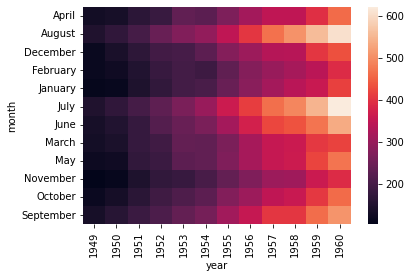

In [64]:
sns.heatmap(df);

# ( !! Bilgilendirme !! ) Bu Arada Asagidaki Grafikte Aylar Sirali Degildir ( !! Bilgilendirme !! )

# Isi Haritasi Elimizde "Yapi Saptamak" Proglemleri Oldugunda Cok Guzel Islevler Gorebilen Fonksiyonlardir

# Yorum; Yillar Bazinda Soldan Saga Dogru Baktigimizda Bir Aydinlanma Oldugunu Goruyoruz
# Aylar bazinda Bakildiginda Da Yaz Aylarinda Yogunluk Oldugu Gorulmektedir

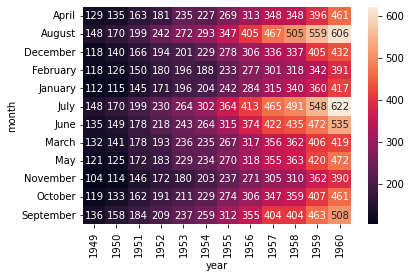

In [65]:
sns.heatmap(df, annot = True, fmt = "d"); # Sayilari Gorebilmek Icin

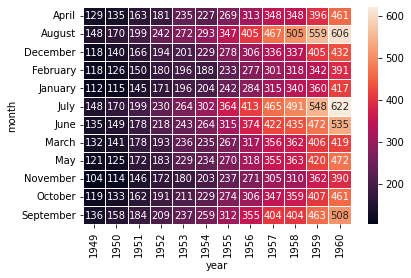

In [66]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5); # Okunmasi Zor Aralarina Cizgi Cekelim Dersek

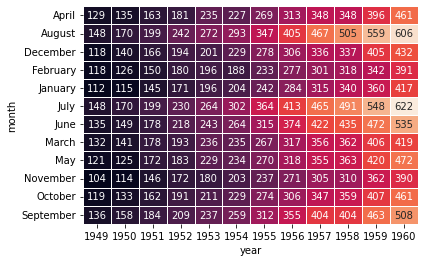

In [67]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False); # Sag Tarafta Bulunan Bar'i Kaldirmak Istersek

In [68]:
# - Cizgi Grafik - ( Digerlerine Gore Daha Zor Problemlerde Kullanilir )

# Zamana Bagli Degiskenlerin Oldugu Veri Setlerinde Ve Nesnelerin Interneti Gibi Senaryolarda Makinalarin Urettigi Veri Gorsellestirme Teknigi 

In [69]:
fmri = pd.read_csv("../input/seaborn-practice/fmri.csv")

df = fmri.copy()

df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# Veri Setinin Hikayesi

Beyne Baglanan Bir Cihaz Araciligi Ile Toplanan Sinyalleri Ifade Eden Bir Veri Setidir

* subject: Verilerin Toplandigi Kisiler
* timepoint: Zaman Noktalari
* event: Verinin Toplanmasi Ile Ilgili Birbirinden Farkli Olaylardir
* region: Sinyalin Toplandigi Sinyali Ifade Ediyor
* signal: Gelen Sinyal

In [70]:
# ( Bilgilendirme ) Bu Veri Seti Yapisal Bir Veri Setidir ( Code'nin Devaminda Yapilan Islemler Ile Bu Anlasilmaktadir )

In [71]:
df.shape

(1064, 5)

In [72]:
# Degiskenlerin Tiplerine Bakmaya Burda Gerek Yok Cunku Kategorik Degiskenler Belli ( subject, event, region)
# Sayisal Degiskenler de Belli ( timepoint, signal )
# timepoint: Kesikli Bir Sayisal Degiskendir ( Kategorik Degiskencesine Muamele Gorebilecek Bir Degiskendir ) ----->>
# ----->> ( Zaman Noktalarini Mutlak Olarak Ifade Ediyor)
# Dolayisi Ile Burada En Cok Odaklanacak Oldugumuz "sinyal" Degiskeni Var
# Bu Veri Setini Nesnelerin Internetiymiscesine Ele Alicaz ( Bilgilendirme )

In [73]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [74]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [75]:
# Genelde Boyle Veri Setleri Geldiginde Onumuze Ilk Ilgilenecegimiz Konu Tekillik Olur Yani Yunik ( Unic ) Degerlere Bakmak Olur
# Acaba Burda "Subject" ler "Yunik" mi?, "Tekil" mi?, "Coklamis" mi?, Her Birisi Icin Ayri Bir "Timepoint" mi Var?  --  Burada Bu Sekilde Veriyi Tamimamiz Gerekir -- Veriyi Anlamamiz Gerekir

In [76]:
df.groupby("timepoint")["signal"].count() # Timepoint'i Grupla ----->> Neyi Gruplaplayacagiz ------->> "signal" ------>> Bu Gruplama Sonrasindaki "Sinyalleri" Saymis Olacaktir ( .count )

# Su Anda Dogrulamis Olduk ---->> Her Bir Zaman Noktasina Gore ( "timepoint" ) Esit Sayida Sayma Islemi Yapilmistir ( Esit Sayida Sinyal Toplanmis ) Buda Su Yorumu Yapmamizi Sagliyor ---->>
# ----->> "Bu Veri Setimiz Mekanik Bir Veri Seti Dir" Yorumunu Yapiyoruz ( Galiba Yapisal Bir Veri Seti Olmasi Burda Anlasiliyor )

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [77]:
# Birde Ustteki Durumu Tersinden Dusunelim ---->> Her Bir Sinyalin Essiz Olmasini Bekleriz ( Evet ) Yani Her Bir Zaman Noktasina 56 Tane Sinyal Varsa Bu Sinyallerin Birbirinden Farkli Olmasini Bekleriz

df.groupby("signal").count() # 1064 Tane Satir Var ( Durumu Dogruladik Hepsi Farkli Bir Ifadedir ) ( Su Sekilde Dogruladik ) ( Ustteki Ifadede 19 Satirin Herbirinde 56 Parca Pardi --->>  19 * 56 = 1064 )

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [78]:
df.groupby("timepoint")["signal"].describe()

# Hemen Bi Goz Gezdirdigimizde Standart Sapma Degerleri Birbirinden Farklilasiyor Demekki Ortalama Etrafindaki Durumlar Birbirene Gore Degisebiliyor Demekki Bu Degisimide Olusturan Bazi Yapilar Var
# Standart Sapma Degerlerinin Bazilari Arasindaki Fark Cok Fazla ( Bilgilendirme ) ( Bi Ust Satirda Da Soylemistim )

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


In [79]:
# Seaborn Kutuphanesi Agregated ( Toplulastirilmis ) Islemler Yapar Yani Cok Daha Karmasik Ifadeleri Cok Daha Kolay Bir Sekilde Gozlemleyebilme Imkani Saglar

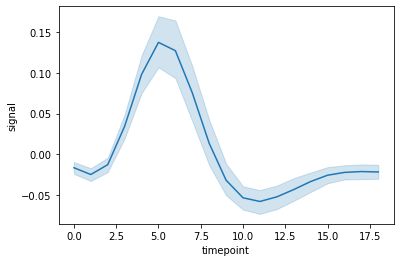

In [80]:
# - Cizgi Grafik Ve Caprazlamalar - 

sns.lineplot(x = "timepoint", y = "signal", data = df);

# Yorum; Grafikte Zaman Noktalarina Gore Sinyalin Artis Ve Azalislarina Gore Bize Bir Bilgi Sunulmustur
# Gorulen Cizgi Ortalama Degerler Dir Ve Her Birisinde 54 Tane Gozlem Oldugunu Ifade Etmistik Bu Durumda Bu Gozlemlerin Ortalamasi Olmus Oluyo Ve Etrafinda Gorunen ( Acik Mavi ) Ifade Standart Sapma'dir
# Yani Standart Sapmalari Ile Olusturulmus Guven Araliklarini Ifade Ediyor
# Bu ( Acik Mavi ) Olarak Gozuken Kisim Bazi Noktalarda Genislemis, Bazi Noktalarda Daralmistir --->> Buda Bazi Noktalarda Sinyallerin Daraldigini, Bazi Noktalarda Ise Artmis Oldugunu Ifade Ediyor
# Her Bir Zaman Noktasinda 56 Deger Var. Bu 56 Deger Farkli Farkli Kisilere Ait, Iste Bu Kisilerin Her Bir Zaman Noktasinda Uretmis Oldugu Sinyallerin Ortalamalari ( Mavi Cizgiler ), Standart Sapma Goz
# Onunde Bulundurularak Araliklar ( Acik Mavi Olan Yerler ) Guven Araliklaridir

# Her Grafik Olusturmada Diger Degiskenleri De Kullanmak Gerekir Cunku Arka Planda Ne Dondugunu Biz Bilmiyoruz ( Detaya Inmeliyiz )

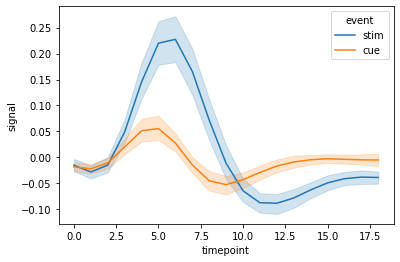

In [81]:
# Bi Kategorik Degisken Ekleyelim ( Boyut Olarak )

sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

# Grafikte Pik Yapan Yer ( Asagi Yonlu, Yukari Yonlu ) Bu Grafikte Aciklanabiliyor Neden Yaptigi
# Pik Yapma Olaylarini "stim" Adli Sinifin Etkiledigi Gozlenmektedir
# Yapisal Bir Veri Seti Uzerinde Calisiyoruz ( Mekanik, Teknik Bir Veri Seti Dir)
# Nesnelerin Interneti Gibi Senaryolarda Ve Bu Tip Senaryolarda Nedensellik Baglaminda Bilgi Tasimayan Veri Setleridir. 
# ( Nedensellik: Neden - Sonuc) Nedensellik Olmasada Yani Etkilerin Birbirini Etkiledigi Durum Olmasa da Meydana Gelen Yapilarin Neden Bu Sekilde Oldugunu Yapisal Anlamda Bize Soyleyebiliyor
# Burada Insan Iliskilerinde ki Gibi Bir Neden Sonuc Iliskisi Yok Fakat Bir Ust Grafikte Olsan Bilginin Teknik ( Mekanik ) Olarak Nasil Olustugunu Bu Sekilde Ayristirabiliyoruz
# Sadece Yukaridaki Grafigi Yorumlamaya Calissaydik, Su Andaki Gibi ( Asagidaki Grafikteki Gibi ) Acik Bir Sekilde Dogru Yorumlayamayacaktik

In [82]:
# Nesnelerin Urettigi Verilerde Genelde Zamana Bagli Ve Bazi Olaylara Bagli Sekilde Olusur ( Ornegin Pc Bozuldu ( Su Soru Sorulur: En Son Ne Olay Yasandi - Hangi Pardasi Degisti Gibi ) )

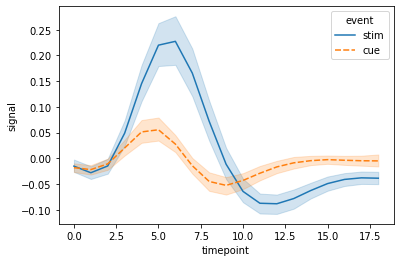

In [83]:
# Biraz Daha Ozellestirelim

sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

# Gorulecegi Uzere "event" Siniflarinin Sekillerini Degistirdik

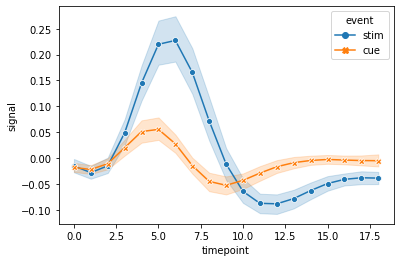

In [84]:
# Grafige Birde Nokta Eklemek Istedigimizi Varsayalim - ( Code Satiri Uzun Olacagi Icin Alt Alta Yazicam )

sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True, dashes = False, data = df);

# Bu Ifade Bize Ortalama Degerleri Isaretleyip Bize Bir Gorsel Sunmus Olucak

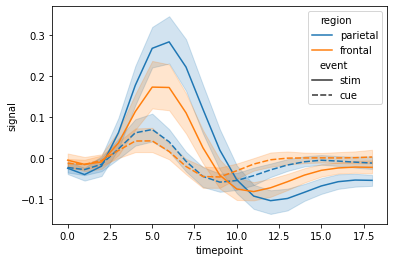

In [85]:
# Bu Ifadeye Bir Boyut Daha Eklemek Istedigimizi Varsayalim

sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df);

# Bir Ustteki Code De Bulunan Bazi Ayarlamalari Kaldirdim ( Bilgilendirme )

In [86]:
# - Basit Zaman Serisi Grafigi -

# Veri Setimizin Hikayesi

Apple'nin Borsadaki Hisse Senedi Degerleri ( Zamana Bagli Bir Veri Seti )

In [87]:
# Indirdik Pc Ye !pip install pandas_datareader

import pandas_datareader as pr # Yahoo Dan Veri Cekmek Icin Gerekliydi ( Gerek Kalmadi ) ( Ama Burda Dursun Simdilik )

In [88]:
# AAPL --->> Apple Hisse Senedini Al Diyoruz Yahoo Adli Siteden, Baslangic Ve Bitis Tarihlerini Girdik ( Ben Code Ile Alamadim Siteden Indirdim Kaggle'ye Yukledim )

df = pd.read_csv("../input/aaplcsv/AAPL.csv")

In [89]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.220583,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.613626,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.151512,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.174417,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.291662,283192000


In [90]:
df.shape

(917, 7)

In [91]:
kapanis = df["Close"]

In [92]:
kapanis.head()

0    26.337500
1    25.677500
2    25.174999
3    24.112499
4    24.240000
Name: Close, dtype: float64

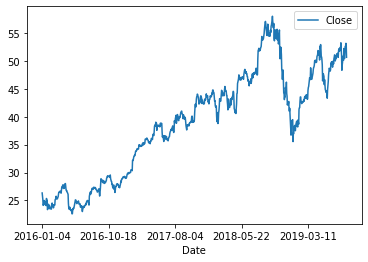

In [93]:
df.plot(x = "Date", y = "Close");

In [94]:
# !! Soo Important !!

# BURDA DA BI HATA ALDIM SADECE BELIRLI BI TARIHE DEGER ATIYO DEGERLER DEGISIYO TARIH DEGISMIYO CODE YI IPTAL EDIYORUM

# kapanis.index = pd.DatetimeIndex(kapanis.index) 

# Indexlerde Bende Index Numaralari Vardi Bunu Giderebilmek Icin ( Orada Tarih Olmasi Lazim di ) Bu Code'yi Kullandik
# Donusturduk 

In [95]:
kapanis.head()

0    26.337500
1    25.677500
2    25.174999
3    24.112499
4    24.240000
Name: Close, dtype: float64